## What is Natural Language Processing (NLP)?

Human language is the primary way we communicate, but it is inherently complex, ambiguous, and unstructured. Computers, on the other hand, operate on structured, numerical data. Natural Language Processing (NLP) is the subfield of computer science and artificial intelligence that provides the methods and algorithms to bridge this gap. It enables computers to read, analyze, and derive meaning from human language in a smart and useful way.

### The Standard NLP Workflow

Most NLP projects follow a standard pipeline of steps to transform unstructured text into actionable insights:

1.  **Raw Text**: The input to the pipeline, which can be any form of text data, such as a social media post, a legal document, a scientific paper, or a book.
2.  **Preprocessing**: Cleaning and standardizing the raw text to prepare it for analysis. This involves removing noise and unnecessary elements to focus on the meaningful parts of the text. **Tokenization** is the first and most fundamental preprocessing step.
3.  **Feature Extraction**: Converting the cleaned text into a numerical representation (vectors or matrices) that machine learning models can understand.
4.  **Modeling**: Applying algorithms to the numerical features to perform a specific task, such as classifying text sentiment, translating between languages, summarizing long documents, or generating new content.

### Tokenization: The First Step in Preprocessing

**Tokenization** is the process of breaking down a continuous stream of text into smaller, meaningful units called **tokens**. These tokens serve as the basic building blocks for all further analysis. There are two primary levels of tokenization.

#### Sentence Tokenization

Sentence tokenization segments a block of text into its constituent sentences. Analyzing text at the sentence level is often more insightful than treating it as a single block, as it preserves the immediate context of words.

The **Natural Language Toolkit (NLTK)** is a foundational library for NLP in Python that provides easy-to-use tools for these tasks.

```python
import nltk
# The 'punkt' tokenizer models are required for tokenization.
# You only need to download this once.
nltk.download('punkt')

# Sample text paragraph
text_block = "Natural Language Processing is a fascinating field. It allows us to build amazing applications. Shall we begin?"

# Tokenize the text into sentences
sentences = nltk.sent_tokenize(text_block)

print(sentences)
```

#### Word Tokenization

Word tokenization segments a sentence or text into its individual words and punctuation marks. This is an essential step for many downstream tasks, such as counting word frequencies, building a vocabulary, or identifying key terms in a document.

```python
# A single sentence for word tokenization
sentence = "Don't wait, claim your 100% free prize now!"

# Tokenize the sentence into words and punctuation
words = nltk.word_tokenize(sentence)

print(words)
```

As you can see, `word_tokenize` is intelligent enough to handle contractions like "Don't" by splitting it into "Do" and "n't", and it correctly separates all words and punctuation into distinct tokens. These tokenization steps are the gateway to nearly all other NLP techniques.

In [2]:
import nltk

# Download the punkt_tab package.
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\jhonm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [3]:
text = """
The stock market saw a significant dip today. Experts believe the downturn may continue.
However, many investors are optimistic about future growth.
"""
# Tokenize the text into sentences
sentences = nltk.sent_tokenize(text)

# Tokenize the first sentence you obtained into words
words = nltk.word_tokenize(sentences[0])
print(words)

['The', 'stock', 'market', 'saw', 'a', 'significant', 'dip', 'today', '.']


## Handling Stop Words

### What are Stop Words?

**Stop words** are words that appear with extremely high frequency in a language but typically contribute little to the overall meaning of a text. They are the grammatical "glue" that holds sentences together, such as articles ("a", "an", "the"), prepositions ("in", "on", "about"), and conjunctions ("and", "but", "or").

### The Rationale for Removal

For many NLP tasks, the goal is to identify the core topics or themes of a document. In this context, stop words act as noise. By removing them, we achieve two primary benefits:

1.  **Reduced Dimensionality**: We reduce the total number of unique words (the vocabulary size) that a model needs to consider.
2.  **Increased Focus**: The model can focus on the content-bearing words that are more likely to be important for the task at hand.

However, removing stop words is not always appropriate. For tasks that require understanding grammatical structure or nuanced meaning, such as machine translation or sentiment analysis on short texts, stop words can be essential and should be retained.

### Implementation in NLTK

The NLTK library provides pre-compiled lists of stop words for many languages. The process involves tokenizing the text and then filtering out any token that appears in the stop word list. It is crucial to convert tokens to a consistent case (typically lowercase) before checking for stop words.

```python
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download the necessary NLTK data (only needs to be done once)
nltk.download('stopwords')
nltk.download('punkt')

# Load the list of English stop words
english_stop_words = set(stopwords.words('english')) # Use a set for faster lookups

# Example of Removing Stop Words 
text = "This is a sample sentence, showing off the stop words filtration."
# Tokenize the text
tokens = word_tokenize(text)

# Filter out stop words using a list comprehension
filtered_tokens = [word for word in tokens if word.lower() not in english_stop_words]

print(f"Original Tokens: {tokens}")
print(f"Filtered Tokens: {filtered_tokens}")
```

### Handling Punctuation

Punctuation marks are symbols used to structure language for human readability. For many NLP models that operate on a "bag-of-words" principle, these symbols provide no meaningful information and can cause issues by making the model treat "word" and "word." as two distinct tokens.

#### The Rationale for Removal

Removing punctuation helps to standardize the text and reduce the vocabulary size. It is a common step in preparing text for tasks that focus on word frequency or keyword identification. Similar to stop words, punctuation should be retained for tasks that rely on full sentence structure or sentiment analysis, where a symbol like an exclamation mark can carry important meaning.

#### Implementation in Python

Python's built-in `string` module provides a convenient string containing common punctuation marks. We can filter our list of tokens to exclude any that are found in this string.

```python
import string

# The string.punctuation constant contains common punctuation marks
print(string.punctuation)

# A Combined Workflow: Removing Stop Words and Punctuation 
text = "This is a sample sentence, showing off the stop words filtration!"

# 1. Tokenize the text
tokens = word_tokenize(text)

# 2. Use a single list comprehension to remove stop words AND punctuation
# We check if the lowercased word is in the stop words set OR if it is in the punctuation set.
clean_tokens = [
    word for word in tokens 
    if word.lower() not in english_stop_words and word not in string.punctuation
]

print(f"Original Tokens: {tokens}")
print(f"Clean Tokens (No Stop Words or Punctuation): {clean_tokens}")
```

This combined workflow provides a simple yet effective method for cleaning raw text and preparing it for further feature extraction and analysis.

In [4]:
import string

print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [5]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download the stopwords dataset from NLTK. This is required for filtering out stop words.
nltk.download("stopwords")

# Load the list of English stop words. These are words that usually do not add significant meaning to text analysis.
stop_words = stopwords.words("english")

text = "This is an example to demonstrate removing stop words."

# Tokenize the text into individual words and punctuation marks. Tokenization is a key first step in text preprocessing.
tokens = word_tokenize(text)

# Remove stop words from the token list. This step helps focus analysis on the most meaningful words.
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

# Remove punctuation from the filtered tokens. Punctuation is often removed to standardize the vocabulary.
clean_tokens = [word for word in filtered_tokens if word not in string.punctuation]

display(clean_tokens)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jhonm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['example', 'demonstrate', 'removing', 'stop', 'words']

In [6]:
from nltk.corpus import stopwords

feedback = "I reached out to support and got a helpful response within minutes!!! Very #impressed"

# Tokenize the provided feedback into words and punctuation. Tokenization is a key first step in text preprocessing.
tokens = nltk.word_tokenize(feedback)

# Get the list of English stopwords. These are words that usually do not add significant meaning to text analysis.
stop_words = stopwords.words("english")

# Remove English stop words from the token list. This step helps focus analysis on the most meaningful words.
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

print(filtered_tokens)

['reached', 'support', 'got', 'helpful', 'response', 'within', 'minutes', '!', '!', '!', '#', 'impressed']


In [7]:
# Import the string module, which contains a list of common punctuation characters.
import string

# Clean the filtered_tokens list by removing all punctuation.
# This step ensures that only meaningful words remain, further reducing noise in the data.
clean_tokens = [word for word in filtered_tokens if word not in string.punctuation]

print(clean_tokens)

['reached', 'support', 'got', 'helpful', 'response', 'within', 'minutes', 'impressed']


## What is Text Normalization?

In natural language, the same concept can be expressed with many different word forms (e.g., "run", "running", "ran"). For a computer, these are all distinct strings. Text normalization is a crucial preprocessing step that groups these variations together. The goal is to reduce the vocabulary size (the number of unique tokens) and ensure that the core meaning of a word is treated consistently, which helps NLP models generalize better.

### Lowercasing

Lowercasing is the most basic and common normalization technique. Computers are case-sensitive, meaning they treat "Data", "data", and "DATA" as three different tokens. Converting all text to a single case (typically lowercase) resolves this.

  * **Why**: It prevents the model from treating the same word with different capitalization as separate entities, which reduces vocabulary size and improves statistical analysis of word frequencies.
  * **How**: Use the standard `.lower()` string method in Python.
  * **When to Avoid**: Lowercasing should be avoided in tasks where case is meaningful, such as identifying proper nouns (e.g., distinguishing "US" the country from "us" the pronoun) or analyzing code.


```python
text = "The DATA SCIENTIST used data from the Data Warehouse."
lower_text = text.lower()
print(lower_text)
```

### Reducing Words to Their Root Form

Beyond casing, we often want to group words with the same core meaning, like "run", "running", and "ran". Stemming and lemmatization are two common techniques for this.

#### Stemming

**Stemming** is a heuristic process that reduces words to their "stem" or root form by crudely chopping off common prefixes and suffixes according to a set of rules.

  * **Advantages**: It is computationally fast and simple.
  * **Disadvantages**: The process often results in non-existent words (e.g., `organizations -> organizat`) because it does not consider the word's dictionary definition or context.
  * **Implementation**: The **Porter Stemmer** is a classic and widely used stemming algorithm available in NLTK.


```python
from nltk.stem import PorterStemmer

# Initialize the stemmer
stemmer = PorterStemmer()

tokens = ['running', 'ran', 'computers', 'organization', 'finally']

# Apply stemming to each token
stemmed_tokens = [stemmer.stem(word) for word in tokens]
print(f"Original Tokens: {tokens}")
print(f"Stemmed Tokens:  {stemmed_tokens}")
```

#### Lemmatization

**Lemmatization** is a more sophisticated process that reduces a word to its dictionary base form, known as the **lemma**. Unlike stemming, it considers the word's part of speech (POS) and meaning to produce a valid dictionary word.

  * **Advantages**: The result is always a valid, interpretable word, which preserves more of the text's meaning.
  * **Disadvantages**: It is significantly slower than stemming because it requires dictionary lookups (e.g., from a resource like WordNet).
  * **Implementation**: The **WordNet Lemmatizer** in NLTK is a standard tool. A crucial detail is that the lemmatizer works best when the part of speech is provided. By default, it assumes the word is a noun.


```python
from nltk.stem import WordNetLemmatizer
import nltk

# Download the necessary NLTK data (only needs to be done once)
nltk.download('wordnet')
nltk.download('omw-1.4') # Open Multilingual Wordnet

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

tokens = ['running', 'ran', 'computers', 'organization', 'finally']

# Apply lemmatization
# Note: Lemmatizing 'ran' correctly to 'run' requires knowing it's a verb.
# The default lemmatize() assumes it's a noun.
lemmatized_tokens = [lemmatizer.lemmatize(word, pos='v') for word in tokens] # pos='v' for verb
print(f"Original Tokens:   {tokens}")
print(f"Lemmatized Tokens: {lemmatized_tokens}")
```
### Stemming vs. Lemmatization: A Comparison

| Feature | Stemming | Lemmatization |
| :--- | :--- | :--- |
| **Process** | Crude heuristic (chops off endings) | Dictionary-based (considers meaning and POS) |
| **Output** | Can be a non-word (e.g., `organizat`) | Always a valid dictionary word (e.g., `organization`)|
| **Speed** | **Fast** | Slow |
| **Accuracy** | Lower | **Higher** |
| **Use Case** | Best for applications where speed is critical and interpretability is less important, such as search engine indexing. | Best for applications requiring grammatical accuracy and understanding of meaning, such as chatbots, machine translation, or sentiment analysis. |

In [8]:
text = """ 
Data Scientists and data engineers need DATA 
"""

lower_text = text.lower()
print(lower_text)

 
data scientists and data engineers need data 



In [9]:
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Download the WordNet lexical database, required for lemmatization.
nltk.download("wordnet")

# Initialize the PorterStemmer object for stemming.
stemmer = PorterStemmer()

# Initialize the WordNetLemmatizer object for lemmatization.
lemmatizer = WordNetLemmatizer()

# Define a list of tokens (words) to be normalized. These include different forms and pluralizations.
tokens = ["running", "bats", "organizations", "reading"]

# Apply stemming to each token. Stemming crudely removes suffixes to reduce words to their stems, which may not be valid words.
stemmed = [stemmer.stem(word) for word in tokens]

# Apply lemmatization to each token. Lemmatization uses a vocabulary and morphological analysis to return valid dictionary words.
lemmatized = [lemmatizer.lemmatize(word) for word in tokens]

print(f"Stemmed token list: {stemmed}")
print(f"Lemmatized token list: {lemmatized}")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jhonm\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Stemmed token list: ['run', 'bat', 'organ', 'read']
Lemmatized token list: ['running', 'bat', 'organization', 'reading']


In [10]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from string import punctuation

# Define the review text to be processed. This sentence contains both stop words and meaningful words.
review = "I have been FLYING a lot lately and the Flights just keep getting DELAYED. Honestly, traveling for WORK gets exhausting with endless delays, but every trip teaches you something new!"

# Convert the provided review into lowercase. Lowercasing standardizes the text and reduces vocabulary size.
lower_text = review.lower()

# Tokenize the lower_text into words and punctuation marks. Tokenization is a key first step in text preprocessing.
tokens = word_tokenize(lower_text)

# Load the list of English stop words. These are words that usually do not add significant meaning to text analysis.
stop_words = stopwords.words("english")

# Use list comprehension to remove stop words and punctuation using the lists of stop_words and string.punctuation.
# This step focuses analysis on the most meaningful words and standardizes the vocabulary.
clean_tokens = [
    word for word in tokens if word not in stop_words and word not in punctuation
]

# Create a PorterStemmer object for stemming.
stemmer = PorterStemmer()

# Apply stemming to each clean token. Stemming reduces words to their root forms, which may not always be valid words.
stemmed_tokens = [stemmer.stem(word) for word in clean_tokens]

# Create a WordNetLemmatizer object for lemmatization.
lemmatizer = WordNetLemmatizer()

# Apply lemmatization to each clean token. Lemmatization returns valid dictionary words.
lemmatized_tokens = [lemmatizer.lemmatize(word) for word in clean_tokens]

print(f"List of clean tokens (removed stop_words): {clean_tokens}")
print(f"list of stemmed tokens: {stemmed_tokens}")
print(f"list of lemmatized tokens: {lemmatized_tokens}")

List of clean tokens (removed stop_words): ['flying', 'lot', 'lately', 'flights', 'keep', 'getting', 'delayed', 'honestly', 'traveling', 'work', 'gets', 'exhausting', 'endless', 'delays', 'every', 'trip', 'teaches', 'something', 'new']
list of stemmed tokens: ['fli', 'lot', 'late', 'flight', 'keep', 'get', 'delay', 'honestli', 'travel', 'work', 'get', 'exhaust', 'endless', 'delay', 'everi', 'trip', 'teach', 'someth', 'new']
list of lemmatized tokens: ['flying', 'lot', 'lately', 'flight', 'keep', 'getting', 'delayed', 'honestly', 'traveling', 'work', 'get', 'exhausting', 'endless', 'delay', 'every', 'trip', 'teach', 'something', 'new']


### The Bag-of-Words (BoW) Model

Machine learning algorithms require numerical input. The Bag-of-Words model is one of the simplest and most widely used methods to convert unstructured text into a numerical format that these algorithms can understand. The process involves two main steps:

1.  **Build a Vocabulary**: First, the entire collection of documents (the "corpus") is scanned to create a comprehensive list of all unique words that appear. This list forms the "vocabulary," and each unique word becomes a feature.
2.  **Count Frequencies**: For each individual document, a numerical vector is created. The length of this vector is equal to the size of the vocabulary. Each element in the vector corresponds to a word in the vocabulary, and its value is the count of how many times that word appears in the document.

This model is called "Bag-of-Words" because the process discards all information about grammar, sentence structure, and word order, effectively treating each document as an unordered "bag" of words.

| Sentence | I | love | NLP | Machine | Learning |
| :--- | :-: | :-: | :-: | :-: | :-: |
| "I love NLP" | 1 | 1 | 1 | 0 | 0 |
| "I love machine learning" | 1 | 1 | 0 | 1 | 1 |


### Implementing BoW with `scikit-learn`

The `scikit-learn` library provides an efficient and easy-to-use implementation of the Bag-of-Words model through its `CountVectorizer` class.

#### 1 Preprocessing the Text

Before vectorizing, it is crucial to preprocess the text to ensure that different forms of the same word are treated as a single token. This typically includes lowercasing, removing punctuation, and potentially removing stop words or applying stemming/lemmatization.

```python
import pandas as pd
import numpy as np
import string
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer

# Sample documents
documents = [
    "NLP is a fascinating field of study.",
    "The study of NLP combines computer science and linguistics.",
    "I find computer science fascinating."
]

# A simple preprocessing function
def preprocess(text):
    text = text.lower() # Lowercase
    tokens = word_tokenize(text) # Tokenize
    # Remove punctuation
    tokens = [word for word in tokens if word not in string.punctuation]
    # Join back into a string for the vectorizer
    return " ".join(tokens)

cleaned_documents = [preprocess(doc) for doc in documents]
print(cleaned_documents)
```

#### 2 Fitting and Transforming

The `CountVectorizer` first learns the vocabulary from the corpus (`.fit()`) and then transforms the documents into a word-count matrix (`.transform()`).

```python
# Instantiate the vectorizer
vectorizer = CountVectorizer()

# Fit the vectorizer to the cleaned documents to build the vocabulary
vectorizer.fit(cleaned_documents)

# Inspect the learned vocabulary
print(vectorizer.get_feature_names_out())

# Transform the documents into a Bag-of-Words matrix
bow_matrix = vectorizer.transform(cleaned_documents)

# The fit_transform() method is a convenient shortcut for both steps
# bow_matrix = vectorizer.fit_transform(cleaned_documents)
```

### Understanding the Output: Sparse Matrices

The output of `CountVectorizer` is a **SciPy sparse matrix**, not a standard NumPy array.

  * **Why?** For any reasonably large corpus, the vocabulary can contain tens of thousands of unique words. However, any single document will only contain a small fraction of these words. This means the resulting BoW matrix will be overwhelmingly filled with zeros. A sparse matrix is a highly memory-efficient data structure that only stores the non-zero elements and their locations, which can save a massive amount of memory and speed up computations.

To inspect the matrix for small examples, you can convert it to a dense array using `.toarray()`. **This should not be done on large datasets**, as it can easily exhaust your computer's memory.

```python
# Print the sparse matrix representation (row, column) -> count
print(bow_matrix)

# Convert to a dense array for inspection
print(bow_matrix.toarray())
```

### Analyzing the BoW Representation

Once you have the BoW matrix, you can perform various analyses, such as finding the most frequent words across the entire corpus.

```python
# Get the total count for each word across all documents
# axis=0 sums the counts down the columns
word_counts = np.sum(bow_matrix.toarray(), axis=0)

# Create a DataFrame for easy viewing
word_freq_df = pd.DataFrame({
    'word': vectorizer.get_feature_names_out(),
    'frequency': word_counts
}).sort_values('frequency', ascending=False)

print(word_freq_df)
```

This numerical representation is the foundation for applying many machine learning models to text data.

In [11]:
from nltk.tokenize import word_tokenize
from string import punctuation


def preprocess(text):
    """
    Preprocesses input text by lowercasing, tokenizing, and removing punctuation.

    Args:
        text (str): The raw input text to preprocess.

    Returns:
        str: A string of tokens separated by spaces, with all punctuation removed and all text lowercased.

    Example:
        >>> preprocess("Hello, World!")
        'hello world'
    """
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in punctuation]
    return " ".join(tokens)

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

# Define a list of raw movie reviews (strings). Each string is a separate document for NLP processing.
reviews = [
    "I loved the movie. It was amazing!",
    "The movie was okay...",
    "I hated the movie. It was boring",
]

# Apply the preprocess function to each review.
cleaned_reviews = [preprocess(review) for review in reviews]

vectorizer.fit(cleaned_reviews)

print(vectorizer.get_feature_names_out())

['amazing' 'boring' 'hated' 'it' 'loved' 'movie' 'okay' 'the' 'was']


In [13]:
X = vectorizer.fit_transform(cleaned_reviews)
print(X.toarray())

[[1 0 0 1 1 1 0 1 1]
 [0 0 0 0 0 1 1 1 1]
 [0 1 1 1 0 1 0 1 1]]


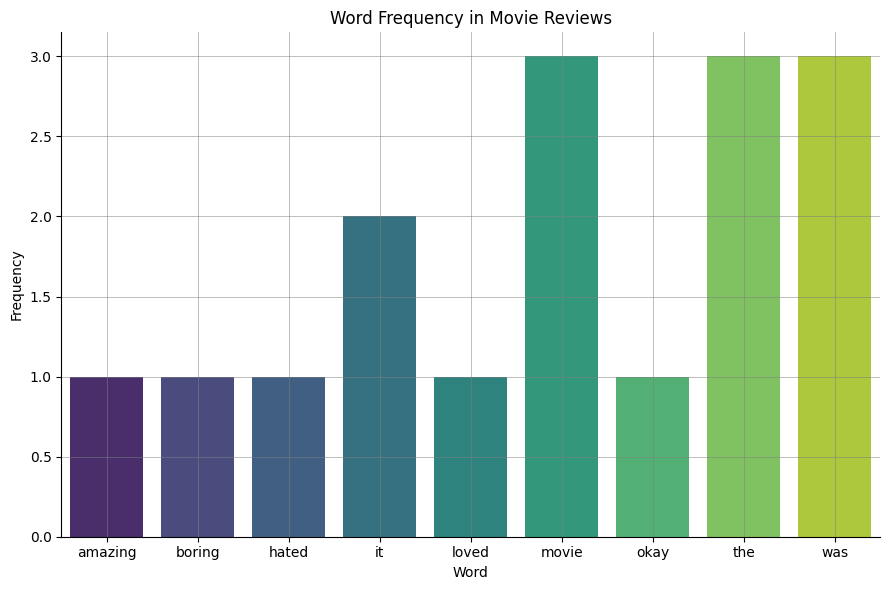

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sum the word counts across all documents (axis=0 sums columns).
# X is a sparse matrix from CountVectorizer; .toarray() converts it to a dense numpy array.
word_counts = np.sum(X.toarray(), axis=0)

# Get the vocabulary (feature names) learned by the vectorizer.
words = vectorizer.get_feature_names_out()

fig, ax = plt.subplots(figsize=(9, 6))

# x=words (feature names), y=word_counts (total counts for each word).
sns.barplot(x=words, y=word_counts, palette="viridis", hue=words, ax=ax)

sns.despine()

# Set axis labels and plot title for clarity.
ax.set(
    xlabel="Word",
    ylabel="Frequency",
    title="Word Frequency in Movie Reviews",
)

ax.grid(True, alpha=0.6, linewidth=0.6, color="grey")

plt.tight_layout()

plt.show()

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

# Define a list of product review strings. Each string is a separate document for NLP processing.
reviews = [
    "The product is fantastic! It works like a charm.",
    "I hated the product. It broke after one use.",
    "Product was okay, not the best, but fine overall.",
]

# Preprocess each review using the preprocess() function.
cleaned_reviews = [preprocess(review) for review in reviews]

# Instantiate the CountVectorizer object, which will build the vocabulary and count word occurrences.
vectorizer = CountVectorizer()

# Fit the vectorizer on the preprocessed reviews to learn the vocabulary from the dataset.
vectorizer.fit(cleaned_reviews)

# Print the resulting vocabulary (feature names) learned by the vectorizer.
print(vectorizer.get_feature_names_out())

['after' 'best' 'broke' 'but' 'charm' 'fantastic' 'fine' 'hated' 'is' 'it'
 'like' 'not' 'okay' 'one' 'overall' 'product' 'the' 'use' 'was' 'works']


In [16]:
# Transform the cleaned_reviews into a Bag-of-Words (BoW) matrix.
X = vectorizer.transform(cleaned_reviews)

# Each row represents a document, and each column represents a word from the vocabulary.
# The values are the counts of each word in each document.
print(X.toarray())

[[0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 1 0 0 1]
 [1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 0]
 [0 1 0 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0]]


In [17]:
def get_top_ten(words, counts):
    """
    Returns the top 10 most frequent words and their counts.

    Args:
        words (array-like): List or array of words (feature names).
        counts (array-like): List or array of word counts, same order as `words`.

    Returns:
        tuple: Two lists:
            - top_words (list): The 10 most frequent words, sorted by frequency descending.
            - top_counts (list): The corresponding counts for the top words.

    Example:
        >>> words = ['apple', 'banana', 'orange']
        >>> counts = [5, 2, 8]
        >>> get_top_ten(words, counts)
        (['orange', 'apple', 'banana'], [8, 5, 2])
    """
    import numpy as np

    words = np.array(object=words)
    counts = np.array(object=counts)
    top_indices = np.argsort(a=counts)[::-1][:10]
    top_words = words[top_indices].tolist()
    top_counts = counts[top_indices].tolist()
    return top_words, top_counts

In [18]:
# X is the Bag-of-Words matrix; axis=0 sums the counts for each word (column) across all documents (rows).
word_counts = np.sum(X.toarray(), axis=0)

# Get the vocabulary (feature names) learned by the vectorizer.
words = vectorizer.get_feature_names_out()

# Use the helper function get_top_ten() to find the 10 most frequent words and their counts.
top_words_with_stopwords, top_counts_with_stopwords = get_top_ten(words, word_counts)

print(top_words_with_stopwords, top_counts_with_stopwords)

['the', 'product', 'it', 'works', 'use', 'was', 'one', 'overall', 'okay', 'not'] [3, 3, 2, 1, 1, 1, 1, 1, 1, 1]


## Beyond Bag-of-Words: The Need for Importance Weighting

The primary limitation of the **Bag-of-Words (BoW)** model is that it treats all words as equally important. A common word like "the", which appears frequently in many documents, will receive a high count, while a rare but highly descriptive word may receive a low count. This often fails to capture the true semantic importance of terms.

**TF-IDF** addresses this by scaling down the weight of frequently occurring words (like stop words) and scaling up the weight of rarer, more informative words.


### The Components of TF-IDF

The TF-IDF score for a word in a document is the product of two distinct metrics: Term Frequency and Inverse Document Frequency.

#### Term Frequency (TF)

**Term Frequency** measures how often a term (`t`) appears in a given document (`d`). A common way to calculate it is by normalizing the raw count by the total number of terms in the document.

$$\text{TF}(t, d) = \frac{\text{Number of times term } t \text{ appears in document } d}{\text{Total number of terms in document } d}$$

The intuition is that words that appear more frequently within a document are more important to that specific document's content.

#### Inverse Document Frequency (IDF)

**Inverse Document Frequency** measures how rare a term (`t`) is across the entire corpus of documents (`D`). It is the logarithm of the total number of documents divided by the number of documents that contain the term.

$$\text{IDF}(t, D) = \log\left(\frac{\text{Total number of documents } |D|}{\text{Number of documents containing term } t}\right)$$

The intuition here is that:

  * Words appearing in **many** documents (e.g., "the", "is") will have an IDF score close to zero, minimizing their importance.
  * Words appearing in **few** documents are considered more unique and informative, resulting in a high IDF score.

#### Putting it Together

The final TF-IDF score is the product of these two metrics.

$$\text{TF-IDF}(t, d, D) = \text{TF}(t, d) \times \text{IDF}(t, D)$$

This score is high when a word is frequent in a specific document but rare across the corpus. It is low when a word is either rare in the document or common across the corpus.


### Implementing TF-IDF with `scikit-learn`

The `scikit-learn` library provides an efficient implementation through its `TfidfVectorizer` class. This object combines all the steps of tokenizing, counting, and applying the TF-IDF transformation into a single, convenient process.

```python
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
# Assume a simple 'preprocess' function from previous topics is available
from nltk.tokenize import word_tokenize
import string

def preprocess(text):
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in string.punctuation]
    return " ".join(tokens)

# Sample documents (reviews)
reviews = [
    "I loved the movie. It was amazing!",
    "The movie was okay, just okay.",
    "I hated the movie. It was boring."
]

# Preprocess the text
cleaned_reviews = [preprocess(review) for review in reviews]

# Instantiate the TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit the vectorizer and transform the documents into a TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(cleaned_reviews)

# The output is a sparse matrix
print(tfidf_matrix)
```


### Visualizing and Interpreting the TF-IDF Matrix

To better understand the results, we can convert the sparse matrix to a dense array and visualize it as a heatmap.

```python
import seaborn as sns
import matplotlib.pyplot as plt

# Get the feature names (vocabulary) from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Create a DataFrame for easy viewing and plotting
df_tfidf = pd.DataFrame(
    tfidf_matrix.toarray(),
    columns=feature_names,
    index=['Review 1', 'Review 2', 'Review 3']
)

# Visualize the TF-IDF scores as a heatmap
# Create a matplotlib figure and axis using the object-oriented interface
fig, ax = plt.subplots(figsize=(12, 6))

# Draw the heatmap on the specified axis
sns.heatmap(df_tfidf, annot=True, cmap="viridis", ax=ax)

# Set the title and axis labels using the axis object
ax.set_title("TF-IDF Scores Across Reviews")
ax.set_xlabel("Terms")
ax.set_ylabel("Documents")

plt.show()
```

**Interpretation**:

  * Words like "amazing", "boring", and "hated" have high TF-IDF scores because they are frequent in their respective reviews but do not appear in the others.
  * The word "okay" has the highest score in Review 2, as it appears twice and is unique to that document.
  * Words that appear in all documents, like "movie" and "was", have their scores down-weighted by the IDF component, reflecting their lower informational value compared to the more descriptive, unique words.

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate the TfidfVectorizer object, which will convert text to TF-IDF features
tfidf = TfidfVectorizer()

# Define a list of raw movie reviews (strings). Each string is a separate document for NLP processing.
reviews = [
    "I loved the movie. It was amazing!",
    "The movie was okay...",
    "I hated the movie. It was boring",
]

# Preprocess each review using the preprocess() function to lowercase and remove punctuation
cleaned_reviews = [preprocess(review) for review in reviews]

# Fit the vectorizer on the preprocessed reviews and transform them into a TF-IDF matrix
tfidf_matrix = tfidf.fit_transform(cleaned_reviews)

print(tfidf.get_feature_names_out())

['amazing' 'boring' 'hated' 'it' 'loved' 'movie' 'okay' 'the' 'was']


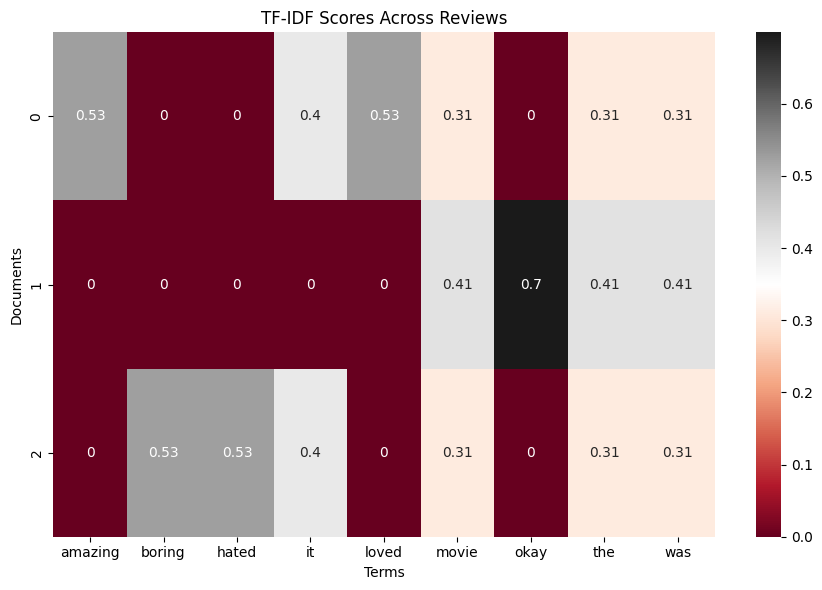

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_tfidf = pd.DataFrame(
    data=tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out()
)

# Create a matplotlib figure and axis using the object-oriented interface
fig, ax = plt.subplots(figsize=(9, 6))

# Draw the heatmap on the specified axis
sns.heatmap(df_tfidf, annot=True, cmap="RdGy", ax=ax)

ax.set_title("TF-IDF Scores Across Reviews")
ax.set_xlabel("Terms")
ax.set_ylabel("Documents")

plt.tight_layout()
plt.show()

In [23]:
import spacy

# Use the package name "en_core_web_lg" directly
nlp = spacy.load("en_core_web_lg")
print(type(nlp))

<class 'spacy.lang.en.English'>


In [24]:
token = nlp("movie")[0]  # Get the token "movie"
print(token.vector[:5])  # Sample: [0.30824, 0.17223, -0.23339, ...]

[ 0.2071  -0.47656  0.15479 -0.38965  0.48447]


_Using this markdown cell due to the unavailability of the Gensim package in my VS Code environment._

```python
import gensim.downloader as api
model = api.load("glove-wiki-giga-50")
print(type(model))
print(model["movie"])
```
Output cell:
```plaintext
<ctass 'gensim.modeLs.keyedvectors.KeyedVectors'>`
[0.30824   0.17223    -0. 23339    0.023105   0.28522   0.23076   -0.41048...]
```

In [ ]:
import spacy

# We use a try-except block to provide a helpful message if the model isn't installed.
try:
    # This command loads the 'en_core_web_lg' model into memory.
    nlp_model = spacy.load("en_core_web_lg")
    print("Model 'en_core_web_lg' loaded successfully.")
except OSError:
    print("Model 'en_core_web_lg' not found.")
    print("Please run: python -m spacy download en_core_web_lg")

Model 'en_core_web_md' loaded successfully.


### Word Embeddings in spaCy
- Each word in the model's vocabulary is associated with a dense vector (embedding) that captures its semantic meaning.
- These vectors are learned from large text corpora and allow you to compare words mathematically (e.g., for similarity).

In [ ]:
import spacy
import numpy as np

# Load the spaCy English model with medium-sized word vectors.
nlp = spacy.load("en_core_web_lg")

# To access the vector for a specific word, use nlp.vocab["word"].vector
# This returns a NumPy array of shape (300,) for "en_core_web_lg" (300 dimensions).
movie_vec = nlp.vocab["movie"].vector

print(type(movie_vec))

# Print the first 10 values of the embedding vector for "movie"
print(movie_vec[:10])

<class 'numpy.ndarray'>
[ 0.2071   -0.47656   0.15479  -0.38965   0.48447   0.59815  -0.060361
 -0.66422   0.53934   1.8491  ]


In [ ]:
# When you call nlp("film"), spaCy tokenizes the string and returns a Doc object.
# Indexing with [0] gets the first (and only) token in this case.
film_token = nlp("film")[0]
movie_token = nlp("movie")[0]

# The .similarity() method computes the cosine similarity between the two word vectors.
# Cosine similarity measures the cosine of the angle between two vectors in the embedding space.
similarity = film_token.similarity(movie_token)

print(similarity)  # Typically, similar words will have a value close to 1.

0.7912190556526184


### Finding the Most Similar Words with spaCy’s Pre-Trained Vectors (en_core_web_lg)
This snippet uses spaCy’s large English model, `en_core_web_lg`, which includes pre-trained 300-dimensional GloVe vectors learned from a large corpus. Each word in the vocabulary is represented as a dense numerical vector that encodes its semantic relationships to other words.

### Normalising the query word
We run our input word through the preprocess() function to lowercase it, tokenise it, and remove punctuation. This ensures our query matches the format used in the model’s vocabulary. Without this, "Movie" and "movie" could be treated as separate entries.

### Retrieving the query vector
The method `nlp.vocab.get_vector(query_word)` fetches the 300-dimensional embedding for the query from spaCy’s vocabulary. These vectors position words in a high-dimensional semantic space where similar meanings are located close together.

### Finding nearest neighbours
We call `nlp.vocab.vectors.most_similar()` to search the entire vocabulary for words whose vectors are most similar to the query vector. This uses cosine similarity — a measure of the angle between two vectors — to capture semantic closeness rather than just raw numeric distance.

### Cleaning the results
The raw results often contain duplicates caused by case variations or plural forms. We apply preprocess() again to each candidate to normalise them, then filter out:

 - The query word itself

 - Exact duplicates after normalisation

### Selecting the top N results
We start by retrieving a slightly larger pool (e.g., top 20) so that after filtering we still have enough candidates. We then keep the top 3 unique, preprocessed results, along with their similarity scores.

In [46]:
# Find the top-3 most similar words to "movie" using spaCy's word vectors

# Step 1: Preprocess the query word to match the format used in your vocabulary (e.g., lowercase, no punctuation)
query_word = preprocess("movie")
query_vec = nlp.vocab.get_vector(query_word)

# Step 2: Find the 20 most similar words (by cosine similarity) to the query vector
keys, rows, scores = nlp.vocab.vectors.most_similar(np.asarray([query_vec]), n=20)

# Step 3: Build a list of (word, similarity score) tuples, skipping the query word itself
nearest = [
    (preprocess(nlp.vocab.strings[key]), float(score))
    for key, score in zip(keys[0], scores[0])
    if preprocess(nlp.vocab.strings[key]) != query_word
]

# Step 4: Deduplicate while keeping order, then select the top 3 unique words
seen = set()
nearest_clean = [
    (word, score) for word, score in nearest if not (word in seen or seen.add(word))
][:3]

print(f"Top-3 neighbours of 'movie': {nearest_clean}")

Top-3 neighbours of 'movie': [('movies', 0.8801000118255615), ('film', 0.7911999821662903), ('films', 0.7516000270843506)]


In [ ]:
from sklearn.decomposition import PCA

# List of words to visualize in 2D space
words = ["film", "movie", "dog", "cat", "car", "bus"]

# Get the word vectors for each word using spaCy's vocabulary
word_vectors = [nlp.vocab.get_vector(word) for word in words]

# Reduce the dimensionality of the vectors from 300D to 2D using PCA
pca = PCA(n_components=2)
word_vectors_2d = pca.fit_transform(word_vectors)

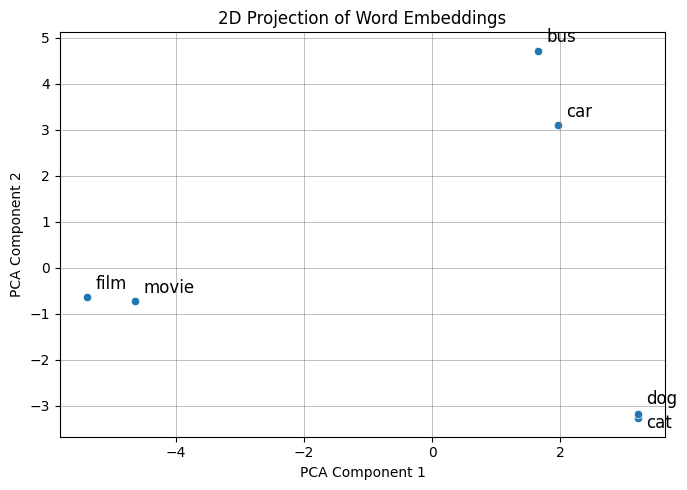

In [54]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.scatterplot(x=word_vectors_2d[:, 0], y=word_vectors_2d[:, 1], ax=ax)

for word, (x, y) in zip(words, word_vectors_2d):
    offset = (6, 6)
    if word in {"cat", "dog"}:
        offset = (6, -10) if word == "cat" else (6, 10)
    ax.annotate(
        word,
        (x, y),
        xytext=offset,
        textcoords="offset points",
        fontsize=12,
        color="black",
    )

ax.grid(True, alpha=0.6, linewidth=0.6, color="grey")
ax.set(
    xlabel="PCA Component 1",
    ylabel="PCA Component 2",
    title="2D Projection of Word Embeddings",
)
plt.tight_layout()
plt.show()

In [ ]:
# Compute the similarity score between "king" and "queen" using spaCy's word vectors.
king_token = nlp("king")[0]
queen_token = nlp("queen")[0]

# The .similarity() method computes the cosine similarity between the two word vectors.
similarity = king_token.similarity(queen_token)

print(similarity)  # Values close to 1 indicate high similarity.

0.7252610921859741


In [66]:
# Get the top 10 most similar words to "computer"
word_vec = nlp.vocab.get_vector("computer")

# Ask for a slightly larger pool, then keep the first 10 unique lowercase items
pool = 50
keys, rows, scores = nlp.vocab.vectors.most_similar(np.asarray([word_vec]), n=pool)

candidates = [
    (nlp.vocab.strings[key], float(score)) for key, score in zip(keys[0], scores[0])
]
# Drop the query itself and collapse casing variants
seen = set(["computer"])
top10 = []
for word, score in candidates:
    w = word.lower()
    if w not in seen:
        top10.append((w, round(score, 4)))
        seen.add(w)
    if len(top10) == 10:
        break

display(top10)

[('computers', 0.8579),
 ('laptop', 0.6772),
 ('software', 0.6707),
 ('desktop', 0.646),
 ('computing', 0.6225),
 ('puter', 0.6149),
 ('laptops', 0.6131),
 ('workstation', 0.599),
 ('hardware', 0.5861),
 ('systems', 0.5759)]

In [67]:
from sklearn.decomposition import PCA

# Define a list of words from different semantic categories (animals, fruits, vehicles)
words = ["lion", "tiger", "leopard", "banana", "strawberry", "truck", "car", "bus"]

# Extract the 300-dimensional word embeddings for each word using spaCy's vocabulary
word_vectors = [nlp.vocab.get_vector(word) for word in words]

# Initialize PCA to reduce the dimensionality from 300D to 2D for visualization
pca = PCA(n_components=2)

# Fit PCA on the word vectors and transform them to 2D
word_vectors_2d = pca.fit_transform(word_vectors)

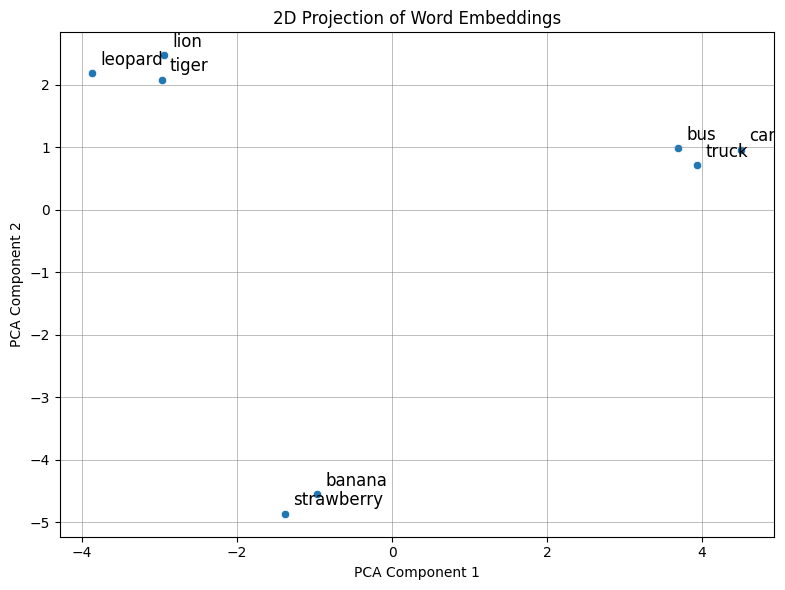

In [68]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the 2D word vectors as points using seaborn's scatterplot
sns.scatterplot(x=word_vectors_2d[:, 0], y=word_vectors_2d[:, 1])

# Annotate each point with its corresponding word label
for word, (x, y) in zip(words, word_vectors_2d):
    # 'offset' should be defined before this loop, e.g., offset = (6, 6)
    ax.annotate(
        text=word,  # The word to display
        xy=(x, y),  # The (x, y) location of the point
        xytext=offset,  # Offset the label from the point for readability
        textcoords="offset points",
        fontsize=12,
        color="black",
    )

ax.grid(True, alpha=0.6, linewidth=0.6, color="grey")

ax.set(
    xlabel="PCA Component 1",
    ylabel="PCA Component 2",
    title="2D Projection of Word Embeddings",
)

plt.tight_layout()
plt.show()